In [59]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [60]:
# Load the dataset
df = pd.read_csv('Unit06 wine.csv')

# Drop the 'Wine' column (actual labels) for clustering
X = df.drop(['Wine'], axis=1)


In [61]:
# Standardize the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [62]:
# Apply K-Means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [63]:
# Add the predicted clusters to the dataframe
df['cluster'] = kmeans.labels_

In [64]:
# Compare the actual wine classes with predicted clusters using a confusion matrix
conf_matrix = confusion_matrix(df['Wine'], df['cluster'])
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 0  0  0  0]
 [ 0  0 59  0]
 [65  3  3  0]
 [ 0 48  0  0]]


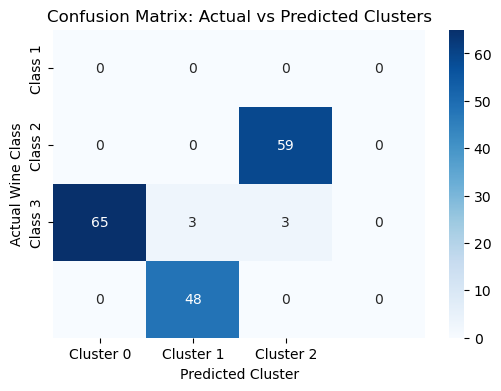

In [65]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'], 
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix: Actual vs Predicted Clusters')
plt.ylabel('Actual Wine Class')
plt.xlabel('Predicted Cluster')
plt.show()


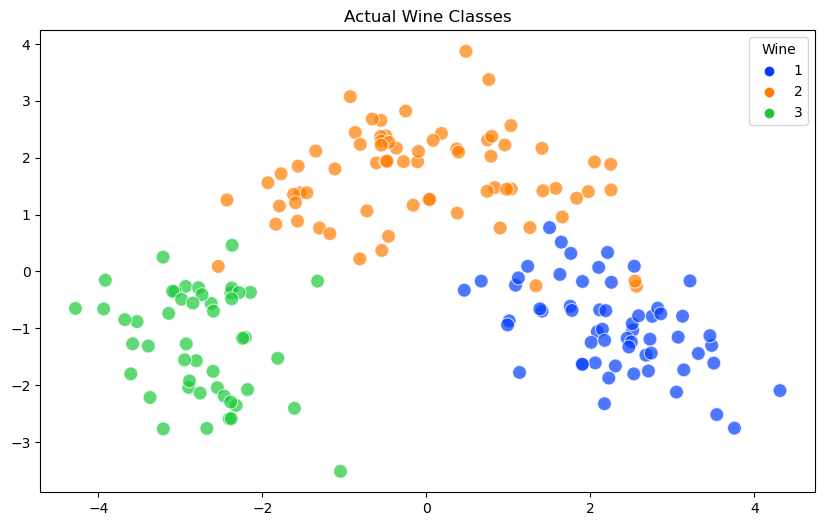

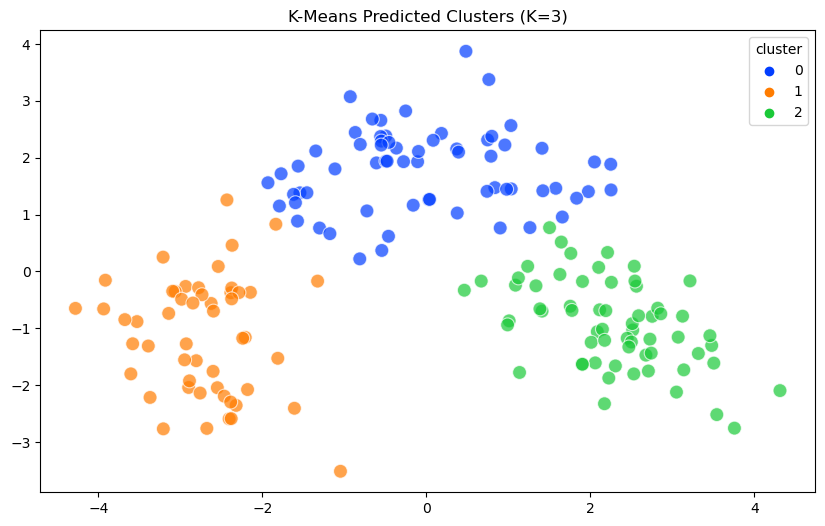

In [66]:
# Apply PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Visualize the actual wine classes
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Wine'], palette='bright', s=100, alpha=0.7)
plt.title('Actual Wine Classes')
plt.show()

# Visualize the clusters predicted by K-Means
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='bright', s=100, alpha=0.7)
plt.title('K-Means Predicted Clusters (K=3)')
plt.show()